In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
print('Setup complete!')

Setup complete!


## Load the Data

In [2]:
# Check the head, info, describe and null values
co2 = pd.read_csv('FuelConsumptionCo2.csv')

In [3]:
co2.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
co2.isnull().sum(axis=0)

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
co2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


## Exploratory Data Analysis

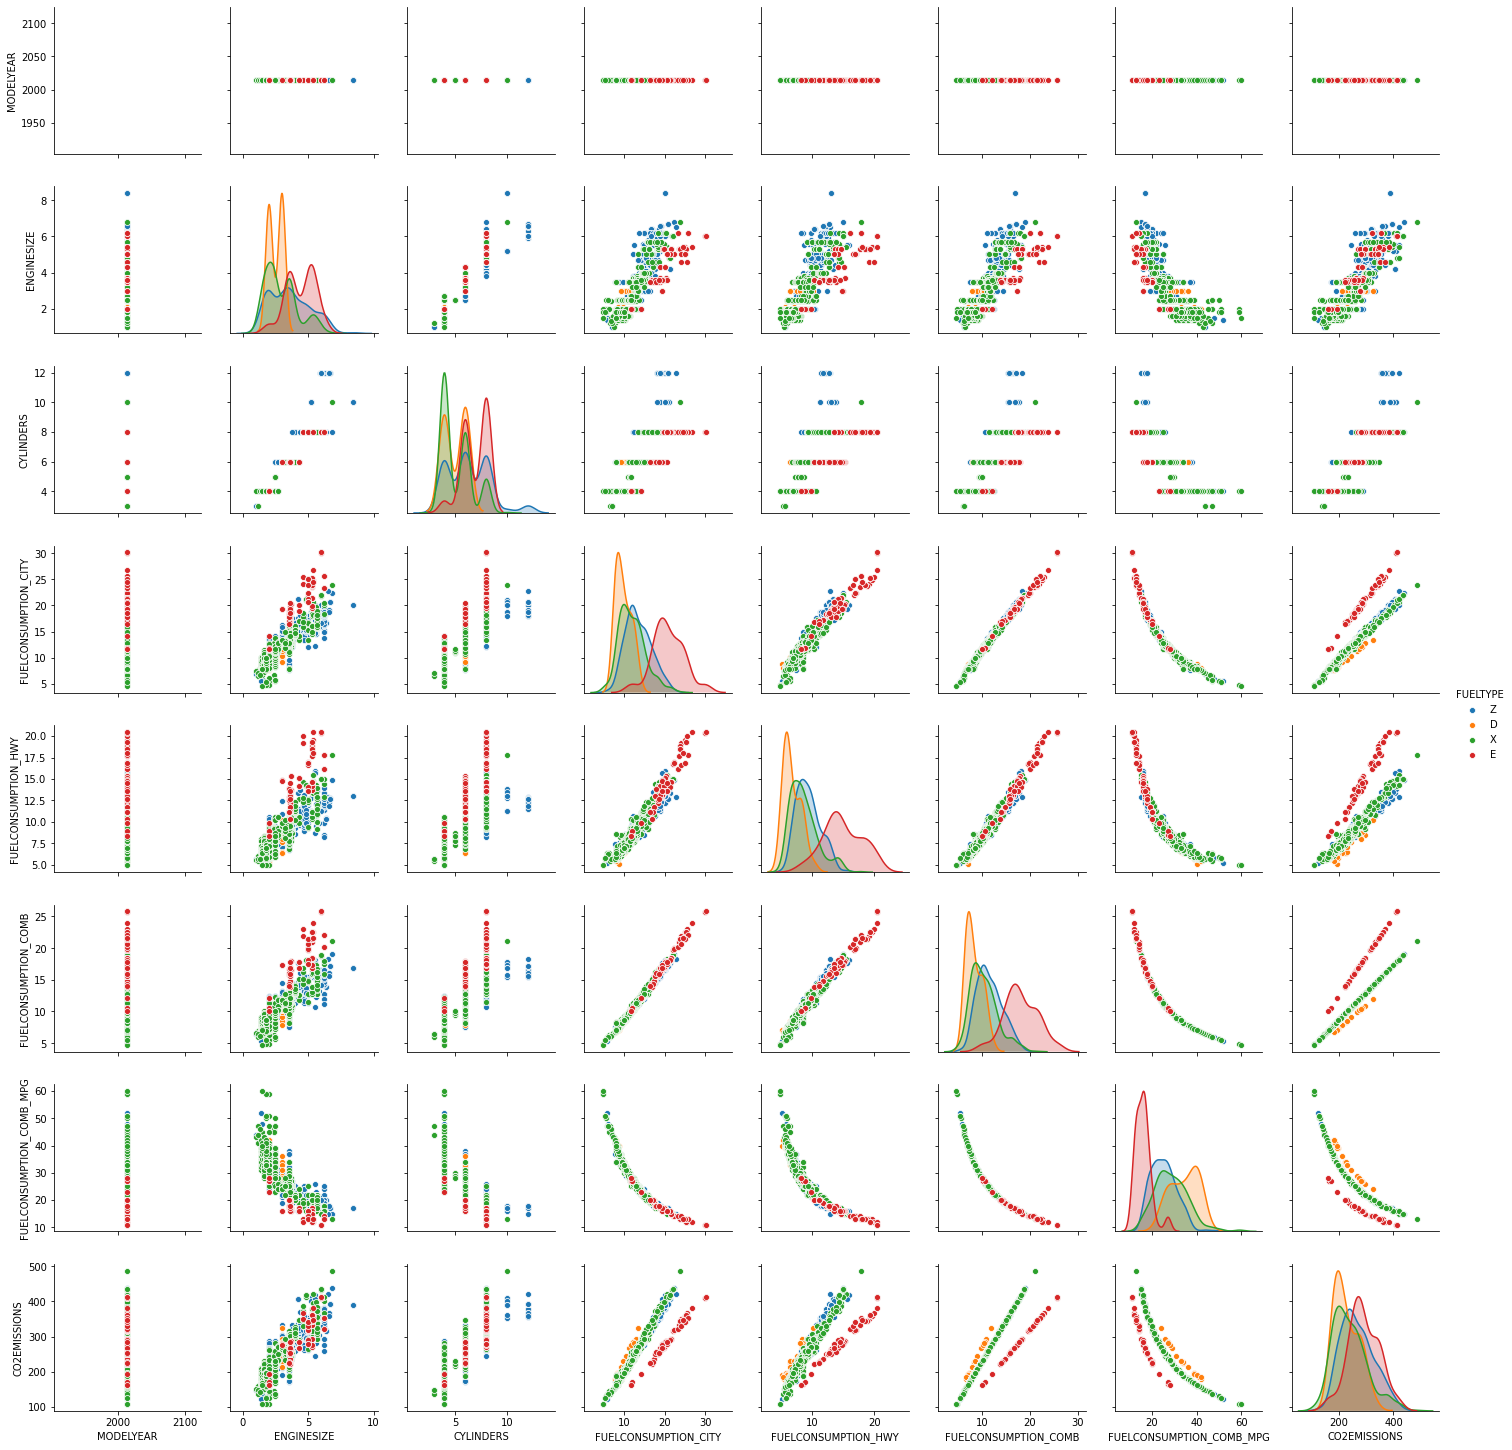

In [7]:
sns.pairplot(data=co2,hue='FUELTYPE')

In [ ]:
# By these plots we can see a linear relationship among the variables,
# so let's use a linear regression to predict the CO2 Emissions

In [ ]:
# Another cool thing is to classify the vehicle by fueltype

## Processing and Modeling

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# I think these features are relevant to our model
X = co2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
y = co2['CO2EMISSIONS']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## XG Boost

In [11]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import plot_importance, plot_tree
print('XG boost ready!')

XG boost ready!


In [12]:
XG_model = xgb.XGBRegressor(n_estimators=1000,learning_rate=0.05)

In [13]:
# Fit the model
XG_model.fit(X_train, y_train,eval_set=[(X_test, y_test)],early_stopping_rounds=50,verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

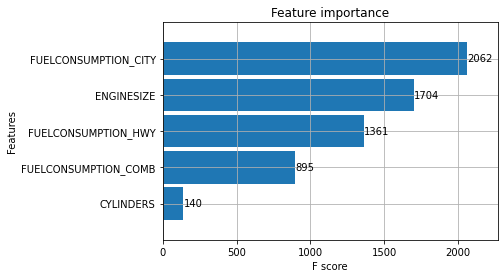

In [14]:
importance = plot_importance(XG_model, height=0.9)

## Predictions

In [15]:
XG_test_prediction = XG_model.predict(X_test)

Text(0, 0.5, 'predictions')

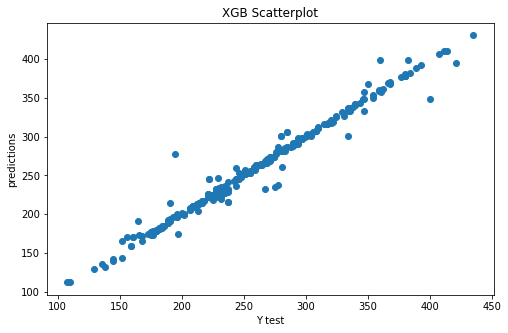

In [16]:
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(y_test,XG_test_prediction)
plt.title('XGB Scatterplot')
plt.xlabel('Y test')
plt.ylabel('predictions')

## Evaluating the model 

In [17]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [18]:
MAE_XG = metrics.mean_absolute_error(y_test, XG_test_prediction)
MSE_XG = metrics.mean_squared_error(y_test, XG_test_prediction)
RMSE_XG = np.sqrt(metrics.mean_squared_error(y_test, XG_test_prediction))

In [19]:
print('MAE:', MAE_XG)
print('MSE:', MSE_XG)
print('RMSE:', RMSE_XG)

MAE: 3.9639295061057975
MSE: 85.02665253380289
RMSE: 9.220989780593127


In [20]:
# The R2 score is used to explain the variance of the model
r2_score(y_test,XG_test_prediction)

0.978919867251229

## Saving the Model

In [21]:
import joblib

In [22]:
filename = 'CO2_Regression.sav'

In [24]:
joblib.dump(XG_model,filename)

['CO2_Regression.sav']